<a href="https://colab.research.google.com/github/ertgrulyksk/breast-cancer-analysis/blob/main/breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

In [67]:
veri = pd.read_csv("kanser.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
veri.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [69]:
veri = veri.rename(columns = {"diagnosis":"hedef"})

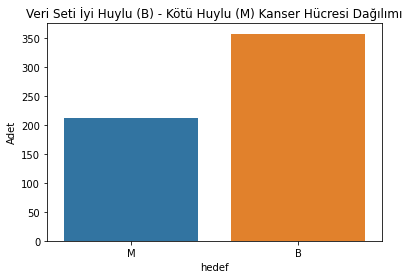

B    357
M    212
Name: hedef, dtype: int64


In [70]:
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri Seti İyi Huylu (B) - Kötü Huylu (M) Kanser Hücresi Dağılımı")
plt.show()
print(veri.hedef.value_counts())

In [71]:
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri.hedef]
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [72]:
print("Verinin uzunluğu: ",len(veri))

Verinin uzunluğu:  569


In [73]:
print("Verinin şekli: ", veri.shape)

Verinin şekli:  (569, 31)


In [74]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [75]:
# basic statistical properties of data
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Figure size 864x576 with 0 Axes>

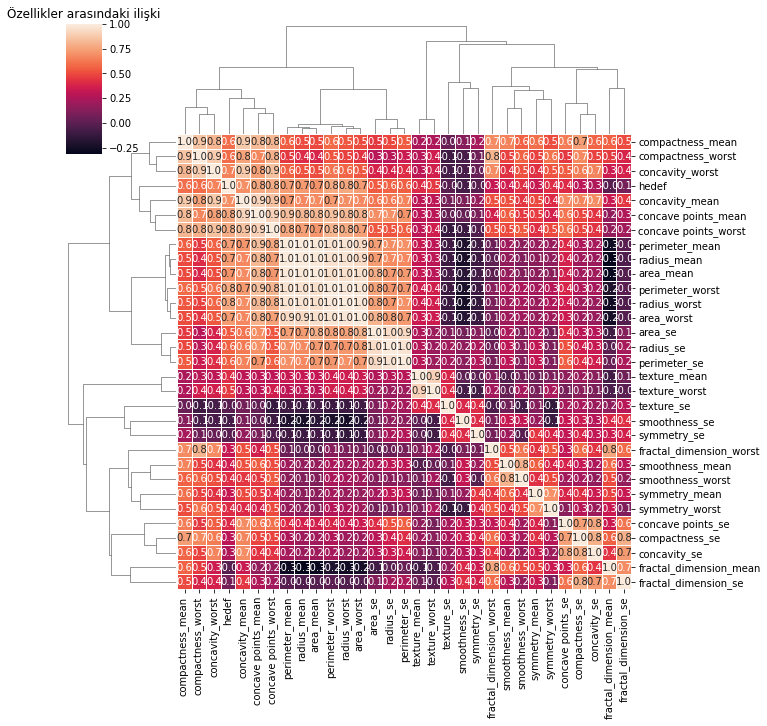

In [76]:
corr_matrix = veri.corr()
plt.figure(figsize = (12,8))
sns.clustermap(corr_matrix, annot = True, fmt = '.1f', linewidths=.01)
plt.title("Özellikler arasındaki ilişki")
plt.show()

<Figure size 432x288 with 0 Axes>

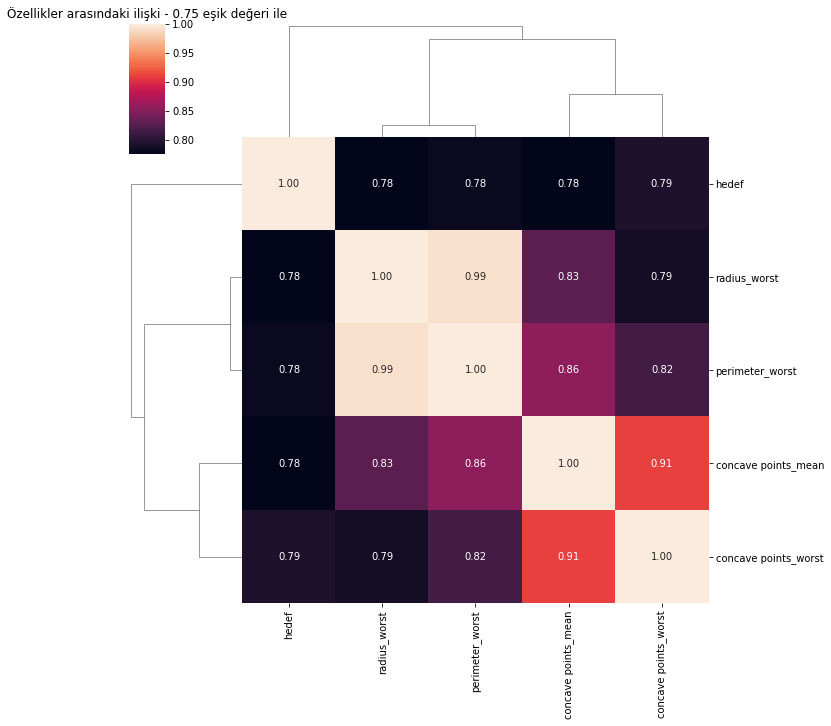

In [77]:
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler arasındaki ilişki - 0.75 eşik değeri ile")
plt.show()

<Figure size 432x288 with 0 Axes>

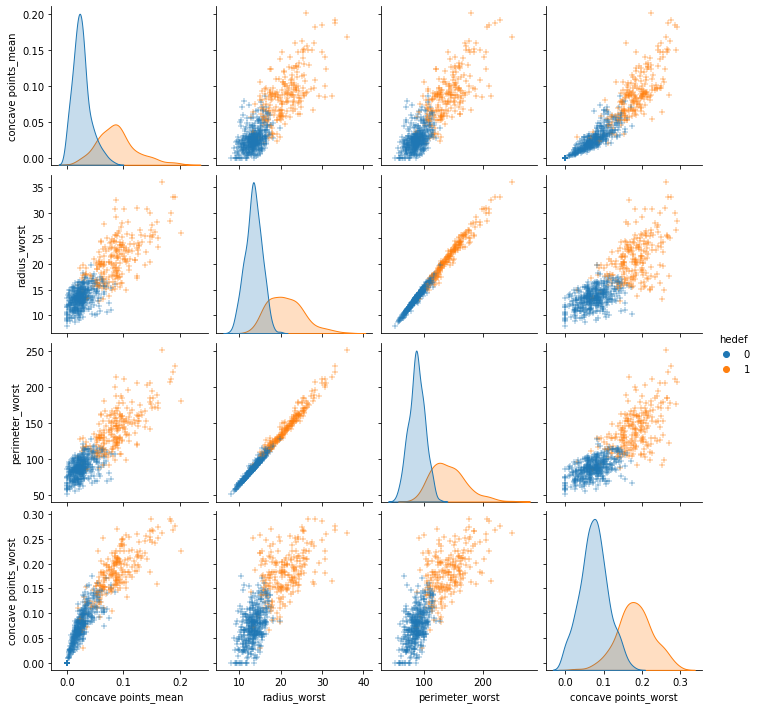

In [78]:
# let's look at the scattering of target-related features
plt.figure()
sns.pairplot(veri[corr_features], diag_kind = "kde", markers = "+", hue = "hedef")
plt.show()

In [79]:
y = veri.hedef
x = veri.drop(["hedef"],axis = 1)
columns = x.columns.tolist()

In [80]:
clf = LocalOutlierFactor()

y_pred = clf.fit_predict(x)

X_score = clf.negative_outlier_factor_

In [81]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [82]:
threshold = -2.2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

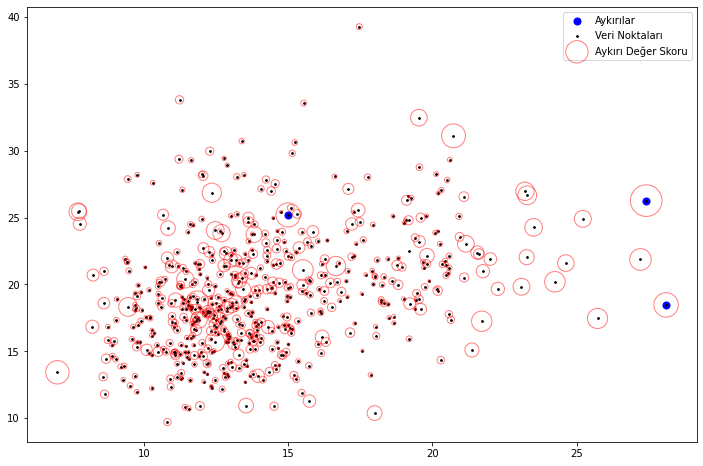

In [83]:
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "blue", s = 50, label = "Aykırılar")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Veri Noktaları")
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r", alpha = 0.5, facecolors = "none", label = "Aykırı Değer Skoru")
plt.legend()
plt.show()

In [84]:
# let's remove outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [85]:
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [86]:
scaler = StandardScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

In [87]:
X_egitim_df = pd.DataFrame(X_egitim, columns = columns)
X_egitim_df_describe = X_egitim_df.describe()
X_egitim_df["hedef"] = Y_egitim

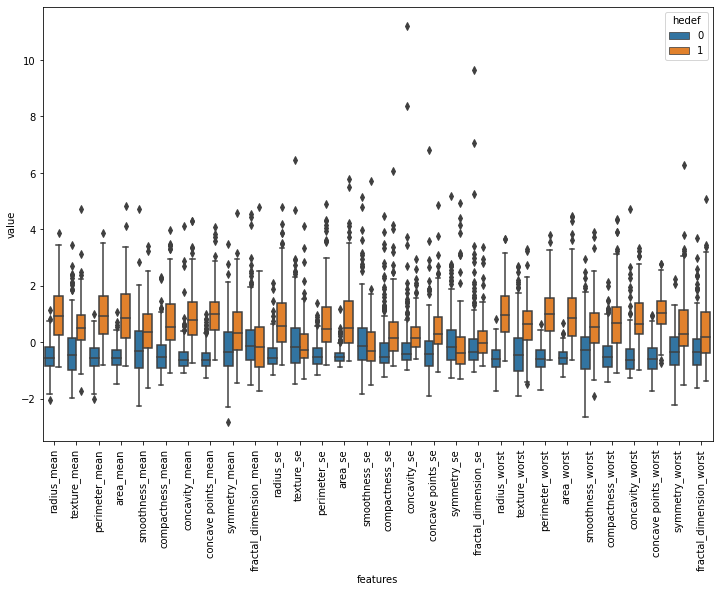

In [88]:
data_melted = pd.melt(X_egitim_df, id_vars = "hedef", var_name = "features", value_name = "value")
plt.figure(figsize=(12, 8))
sns.boxplot(x = "features", y = "value", hue = "hedef", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [89]:
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_egitim, Y_egitim)

KNeighborsClassifier(n_neighbors=2)

In [90]:
y_pred = knn.predict(X_test)

Karışıklık Matrisi:  [[102   0]
 [ 11  57]]


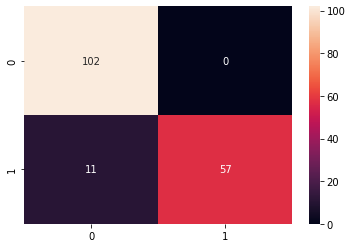

In [91]:
cm = confusion_matrix(Y_test, y_pred)
print("Karışıklık Matrisi: ", cm)
plt.figure()
sns.heatmap(cm , annot = True, fmt = ".0f")
plt.show()

In [92]:
dogruluk = accuracy_score(Y_test, y_pred)
print("Doğruluk: ", dogruluk)

Doğruluk:  0.9352941176470588


In [93]:
def eniyiParametreler(x_egitim, x_test, y_egitim, y_test):

  k_range = list(range(1,31))
  weight_options = ["uniform","distance"]
  
  param_grid = dict(n_neighbors = k_range, weights = weight_options)
  
  knn = KNeighborsClassifier()
  grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
  grid.fit(x_egitim, y_egitim)
  print("En iyi eğitim skoru: {} ve parametreler: {}".format(grid.best_score_, grid.best_params_))
  print()

  knn = KNeighborsClassifier(**grid.best_params_)
  knn.fit(x_egitim, y_egitim)
  y_pred_test = knn.predict(x_test)
  y_pred_train = knn.predict(x_egitim)
  cm_test = confusion_matrix(y_test, y_pred_test)
  cm_train = confusion_matrix(y_egitim, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)
  acc_train = accuracy_score(y_egitim, y_pred_train)
  
  print("Test doğruluğu: {}, Eğitim doğruluğu: {}".format(acc_test, acc_train))
  print()
  print("Karışıklık Matrisi Test: ")
  print(cm_test)
  print("Karışıklık Matrisi Eğitimi: ")
  print(cm_train)

  return grid

In [94]:
grid = eniyiParametreler(X_egitim, X_test, Y_egitim, Y_test)

En iyi eğitim skoru: 0.972051282051282 ve parametreler: {'n_neighbors': 4, 'weights': 'distance'}

Test doğruluğu: 0.9470588235294117, Eğitim doğruluğu: 1.0

Karışıklık Matrisi Test: 
[[100   2]
 [  7  61]]
Karışıklık Matrisi Eğitimi: 
[[255   0]
 [  0 141]]


In [95]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [96]:
pca = PCA(n_components = 2)

In [97]:
pca.fit(x_scaled)

PCA(n_components=2)

In [98]:
X_reduced_pca = pca.transform(x_scaled)

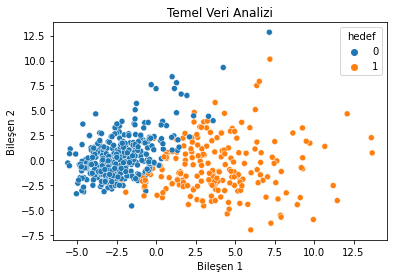

In [99]:
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = pca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [100]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)

In [101]:
grid_pca = eniyiParametreler(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

En iyi eğitim skoru: 0.9518589743589743 ve parametreler: {'n_neighbors': 7, 'weights': 'uniform'}

Test doğruluğu: 0.9294117647058824, Eğitim doğruluğu: 0.9545454545454546

Karışıklık Matrisi Test: 
[[97  5]
 [ 7 61]]
Karışıklık Matrisi Eğitimi: 
[[247   8]
 [ 10 131]]


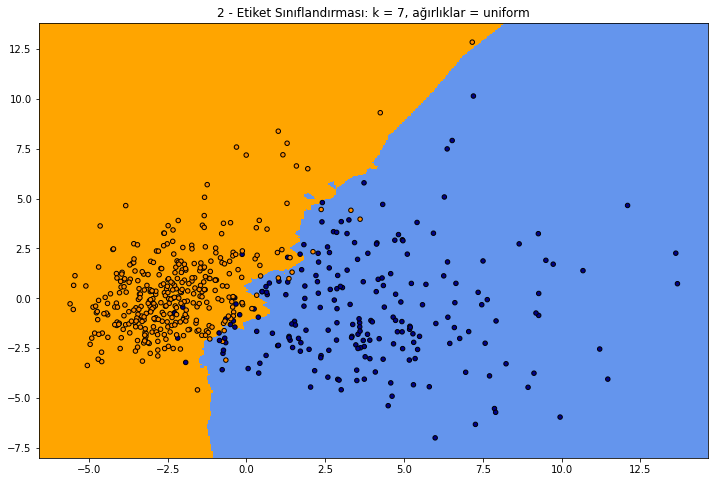

In [130]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = 0.05
X = X_reduced_pca
x_min, x_max= X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max= X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])
 
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması: k = {}, ağırlıklar = {}".format(2, grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

In [132]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)

In [133]:
nca.fit(x_scaled, y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [134]:
X_reduced_nca = nca.transform(x_scaled)

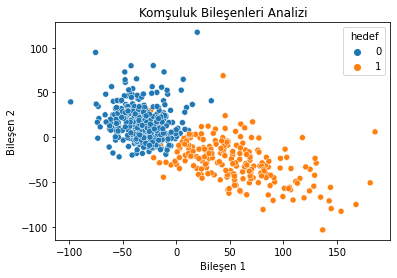

In [136]:
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = nca_data)
plt.title("Komşuluk Bileşenleri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [137]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.3, random_state = 42)

In [138]:
grid_nca = eniyiParametreler(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

En iyi eğitim skoru: 0.9923717948717948 ve parametreler: {'n_neighbors': 1, 'weights': 'uniform'}

Test doğruluğu: 0.9764705882352941, Eğitim doğruluğu: 1.0

Karışıklık Matrisi Test: 
[[101   1]
 [  3  65]]
Karışıklık Matrisi Eğitimi: 
[[255   0]
 [  0 141]]


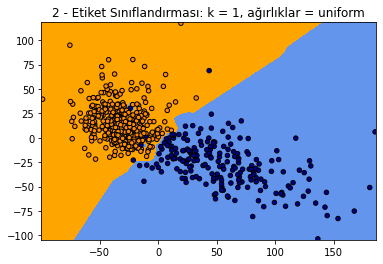

In [139]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = 0.2
X = X_reduced_nca
x_min, x_max= X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max= X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])
 
Z = Z.reshape(xx.shape)
plt.figure()

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması: k = {}, ağırlıklar = {}".format(2, grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.show()